# 🚀 Module 3: Model Packaging and Deployment on Kubernetes

In this module, we will:
1. Load the Trained Model from MLflow
2. Build a REST API for model inference
3. Create a Dockerfile to containerize the service
4. Deploy the container to a Kubernetes cluster (Minikube or OpenShift)
5. Optionally, expose and test the deployed service

Make sure MLflow is installed in your environment:

```bash
pip install mlflow
```

In [2]:
# Install requirements
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 207.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 190.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 236.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.2/573.2 kB 380.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 206.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 269.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 257.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 254.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 416.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 571.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 489.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

## 📦 Import Required Libraries

Before we proceed with training and tracking our machine learning model, we need to import the necessary libraries.


In [3]:
# Import necessary modules
import os
import joblib

import requests

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np

import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

## 🧳 Select and Load a trained Model Version from MLflow

In this step, we interact with the MLflow Model Registry to:

1. **List all available versions** of a registered model (`BikeSharingModel`) along with their metadata, such as version number, stage, and run ID.
2. **Prompt the user** to choose a specific version to use for deployment or analysis.
3. **Download the selected model** from the MLflow tracking server using the model URI.

This makes it easy to manage multiple iterations of a model and ensures reproducibility when deploying or testing specific versions.


In [5]:
# Initialize MLflow client
MLFLOW_TRACKING_URI = 'https://mlflow-mlflow.apps.cluster-x5r72.dynamic.redhatworkshops.io'
mlflow.set_tracking_uri(f"{MLFLOW_TRACKING_URI}")
client = MlflowClient()

model_name = "BikeSharingModel"

# List available versions
versions = client.search_model_versions(filter_string=f"name='{model_name}'", order_by=["version_number DESC"])

print("📦 Available versions for model:", model_name)
for v in versions:
    print(f"Version: {v.version}, Stage: {v.current_stage}, Status: {v.status}, Run ID: {v.run_id}")

# Ask the user to select a version
selected_version = input("Enter the version number you want to download: ").strip()

# Load the selected model version
model_uri = f"models:/{model_name}/{selected_version}"
model = mlflow.pyfunc.load_model(model_uri=model_uri)

print(f"✅ Model version {selected_version} loaded successfully from MLflow.")

📦 Available versions for model: BikeSharingModel
Version: 1, Stage: None, Status: READY, Run ID: a7750d532dd641e78c6c7879cc1b79ac


Enter the version number you want to download:  1


✅ Model version 1 loaded successfully from MLflow.


## 🚀 Local Deployment: Test the MLflow Model Server

To verify that the registered model works correctly, we serve it locally using MLflow’s model server, while still using the remote MLflow tracking server.

- Run the following commands in Git Bash or your terminal:
  ````sh
      mlflow models serve -m "models:/MODEL_NAME/MODEL_VERSION" --env-manager local --no-conda
  ````
    
    - Replace MODEL_NAME and MODEL_VERSION with your actual model name and version number.

    - The --env-manager local flag tells MLflow to use your current Python environment.

    - --no-conda skips creating a new Conda environment.
 
- Once the server is running, you can send prediction requests to:

    ````sh
    http://127.0.0.1:5000/invocations
    ````

In [ ]:
# Load the training data
# data_path = "./data/processed/"

# # Read both CSV files
# data_01 = pd.read_csv(data_path + 'data_2011_01.csv')
# data_02 = pd.read_csv(data_path + 'data_2011_02.csv')

# # Concatenate the datasets
# # input_data_df = pd.concat([data_01, data_02, data_03], ignore_index=True)
# input_data_df = pd.concat([data_01, data_02], ignore_index=True)

# input_data_df.head()

# sample_input = input_data_df.sample(n=5, random_state=55).reset_index(drop=True)

# sample_input.head()

# # Save the generated sample input to a data under models.
# filename = "./models/sample_input_data.csv"
# sample_input.to_csv(filename, index=False)
# print(f"Saved {filename}")

# # Load the saved data to see if it was generated and stored properly.
# sample_input_loaded = pd.read_csv('./models/sample_input_data.csv')
# sample_input_loaded.head()

In [7]:
# Prepare 5 samples as inference inputs
model_path = "./models/"

# Read both CSV files
sample_input = pd.read_csv(model_path + 'sample_input_data.csv')

# sample_input.to_dict(orient ='split')
sample_input.head()

,dteday,instant,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-02-25,1247,1,0,2,1,0,5,1,2,0.32,0.3485,1.00,0.0000,1,9,10
1,2011-02-16,1055,1,0,2,16,0,3,1,1,0.46,0.4545,0.31,0.3881,26,96,122
2,2011-01-02,36,1,0,1,12,0,0,0,2,0.36,0.3333,0.66,0.2985,20,73,93
3,2011-02-14,1002,1,0,2,9,0,1,1,1,0.40,0.4091,0.37,0.3881,8,122,130
4,2011-02-04,766,1,0,2,8,0,5,1,1,0.14,0.1515,0.74,0.1343,3,217,220


In [8]:
# We define the sample inputs using the same numerical and categorical features 
# used for model training
numerical_features=['temp', 'atemp', 'humidity', 'windspeed', 'hour', 'weekday']
categorical_features=['season', 'holiday', 'workingday']

sample_X_input = sample_input[numerical_features + categorical_features]
sample_y_input = sample_input["count"]

sample_X_input.head()

,temp,atemp,humidity,windspeed,hour,weekday,season,holiday,workingday
0,0.32,0.3485,1.00,0.0000,1,5,1,0,1
1,0.46,0.4545,0.31,0.3881,16,3,1,0,1
2,0.36,0.3333,0.66,0.2985,12,0,1,0,0
3,0.40,0.4091,0.37,0.3881,9,1,1,0,1
4,0.14,0.1515,0.74,0.1343,8,5,1,0,1


In [9]:
# Prepare the inference Requests
inference_request = {
    "dataframe_split": 
        sample_X_input.to_dict(orient ='split')
}

In [10]:
# Send a prediction request to the locally depoloyed model
endpoint = "http://127.0.0.1:5000/invocations"
response = requests.post(endpoint, json=inference_request)

# print(response.json()['predictions'].int())

# Check if the response is successful
if response.status_code == 200:
    # Process the prediction response
    predictions = pd.DataFrame(response.json()['predictions'], columns=['Predicted Count'])

    # Combine predictions with actual classes
    actual_class_test = sample_y_input.reset_index(drop=True)
    model_output = pd.concat([predictions, actual_class_test], axis=1)

    # Rename columns for clarity
    model_output.columns = ['Predicted Count', 'Actual  Count']

    # Display the final output
    print(model_output)
    
else:
    print(f"Request failed with status code: {response.status_code}")
    print(f"Response content: {response.text}")

# Let's plot it in in a x vs y. it is then more clear to the eye!

   Predicted Count  Actual  Count
0             8.56             10
1           120.97            122
2            90.67             93
3           137.45            130
4           209.46            220


/opt/app-root/lib64/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


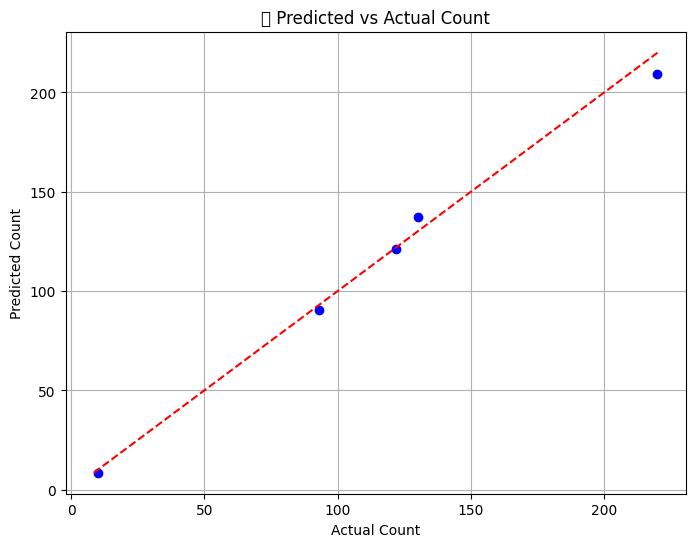

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(model_output['Actual  Count'], model_output['Predicted Count'], color='blue')
plt.plot([model_output.min().min(), model_output.max().max()], 
         [model_output.min().min(), model_output.max().max()], 
         color='red', linestyle='--')  # Identity line

plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('🔍 Predicted vs Actual Count')
plt.grid(True)
plt.show()

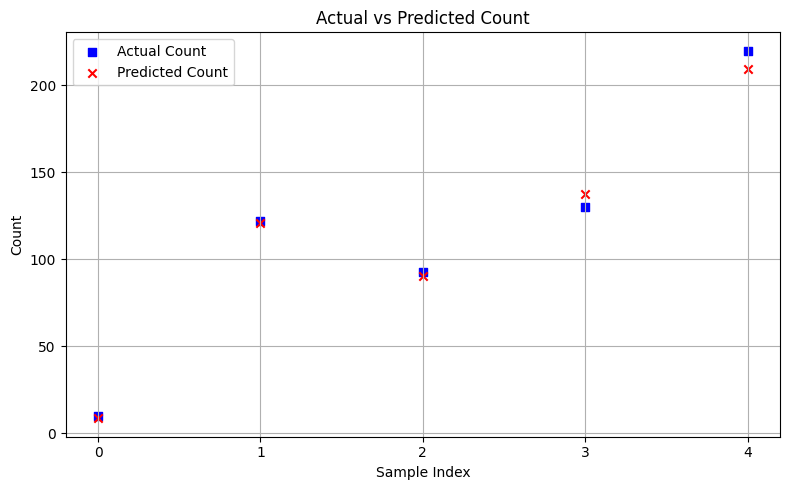

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples
x = np.arange(len(model_output))

plt.figure(figsize=(8, 5))

# Plot actual values as squares
plt.scatter(x, model_output['Actual  Count'], label='Actual Count', marker='s', color='blue')

# Plot predicted values as crosses
plt.scatter(x, model_output['Predicted Count'], label='Predicted Count', marker='x', color='red')

plt.xlabel("Sample Index")
plt.ylabel("Count")
plt.title("Actual vs Predicted Count")
plt.xticks(x)  # Show sample indices clearly
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 💾 Save the Selected Model Locally

After downloading the desired model version from MLflow, we save it to the local `models/` directory using the `joblib` format.

This step is essential for:
- Packaging the model into a Docker container
- Making the model available to inference services (e.g., FastAPI or Flask)
- Versioning models on disk for offline use or audit trails

The model file is named using the selected version number to avoid confusion and maintain clarity (e.g., `bike_model_v3.pkl`).


In [3]:
# Optionally, save it locally for container usage
os.makedirs("./models", exist_ok=True)
model_path = f"./models/bike_model_v{selected_version}.pkl"
joblib.dump(model, model_path)

print(f"✅ Model version {selected_version} downloaded from MLflow and saved to {model_path}")

✅ Model version 1 downloaded from MLflow and saved to ./models/bike_model_v1.pkl


## 🛠️ Create a REST API using FastAPI
This API will load the model and expose an endpoint for predictions.

In [4]:
%%writefile ./models/app.py
from fastapi import FastAPI
import joblib
import pandas as pd

app = FastAPI()
model = joblib.load("bike_model.pkl")

@app.post("/predict")
def predict(features: dict):
    df = pd.DataFrame([features])
    prediction = model.predict(df)[0]
    return {"prediction": prediction}

Writing ./models/app.py


## 📦 Containerize with Docker
Create a Dockerfile for the FastAPI app.

In [5]:
%%writefile ./models/Containerfile
FROM python:3.9-slim
WORKDIR /app
COPY bike_model.pkl app.py ./
RUN pip install fastapi[all] joblib pandas
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]

Writing ./models/Cntainerfile


## 🧱 Build and Run Docker Container Locally

In [5]:
!docker build -t bike-api ./models
!docker run -d -p 8000:8000 --name bike-api bike-api

/usr/bin/sh: line 1: docker: command not found
/usr/bin/sh: line 1: docker: command not found


## ☸️ Deploy to Kubernetes
Create a Kubernetes deployment and service manifest.

In [ ]:
%%writefile ./models/k8s_deployment.yaml
apiVersion: apps/v1
kind: Deployment
metadata:
  name: bike-api
spec:
  replicas: 1
  selector:
    matchLabels:
      app: bike-api
  template:
    metadata:
      labels:
        app: bike-api
    spec:
      containers:
      - name: bike-api
        image: bike-api:latest
        ports:
        - containerPort: 8000
---
apiVersion: v1
kind: Service
metadata:
  name: bike-api-service
spec:
  selector:
    app: bike-api
  ports:
    - protocol: TCP
      port: 80
      targetPort: 8000
  type: NodePort

## 🚀 Deploy to Kubernetes

In [ ]:
!kubectl apply -f ./models/k8s_deployment.yaml

## 🧪 Test the API Endpoint

In [ ]:
# Replace <NodePort> with the actual exposed port
!curl -X POST "http://localhost:<NodePort>/predict" -H "Content-Type: application/json" -d '{"temp": 25, "hum": 0.8, "windspeed": 0.1}'

## ✅ Summary
- Exported the trained model
- Built a FastAPI service for prediction
- Containerized the API using Docker
- Deployed the container to Kubernetes
- Exposed and tested the endpoint